# Making some simple graphs

In [1]:
#use the imports I may or maynot end up using these graphs
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
#read in the data
df = pd.read_csv(r'data\Apple 2009-2024.csv')

In [3]:
#make a new df to do the cleaning with 
#I want to make sure we have a copy of the orignal df 
clean_df = df

In [4]:
clean_df.head

<bound method NDFrame.head of     year EBITDA (millions) Revenue (millions) Gross Profit (millions)  \
0   2024          $134,661           $391,035                $180,683   
1   2023          $125,820           $383,285                $169,148   
2   2022          $130,541           $394,328                $170,782   
3   2021          $120,233           $365,817                $152,836   
4   2020           $77,344           $274,515                $104,956   
5   2019           $76,477           $260,174                 $98,392   
6   2018           $81,801           $265,595                $101,839   
7   2017           $71,501           $229,234                 $88,186   
8   2016           $70,529           $215,639                 $84,263   
9   2015           $82,487           $233,715                 $93,626   
10  2014           $60,449           $182,795                 $70,537   
11  2013           $55,756           $170,910                 $64,304   
12  2012           $5

In [5]:
# clean the data by dropping all of the special signs and also by converting the data into ints
def removeExtra(df,colName):
    df[colName] = df[colName].replace({'\$':'',',':'','%':''},regex = True)
    return df

#ill take care of this in 2 steps to be more functional 
def colToInt(df,colName):
    df[colName] = df[colName].astype(int)
    return df

#this is just some decent practice 
def colToFloat(df,colName):
    df[colName] = df[colName].astype(float)
    return df

# create an array of the cols that we want to change into ints
intsNeeded = ['EBITDA (millions)','Revenue (millions)','Gross Profit (millions)','Op Income (millions)',
'Net Income (millions)','Shares Outstanding','Total Assets (millions)','Cash on Hand (millions)',
'Total Liabilities (millions)','Employees','Long Term Debt (millions)']

# make an array of col's that I want to change into floats 
floatsNeeded = ['EPS','Gross Margin']

for cols in clean_df:
    removeExtra(clean_df,cols)

for cols in intsNeeded:
    colToInt(clean_df,cols)

for cols in floatsNeeded:
    colToFloat(clean_df,cols)


<>:3: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
C:\Users\eyas1\AppData\Local\Temp\ipykernel_16376\3917677816.py:3: SyntaxWarning: invalid escape sequence '\$'
  df[colName] = df[colName].replace({'\$':'',',':'','%':''},regex = True)


<Axes: xlabel='year', ylabel='Employees'>

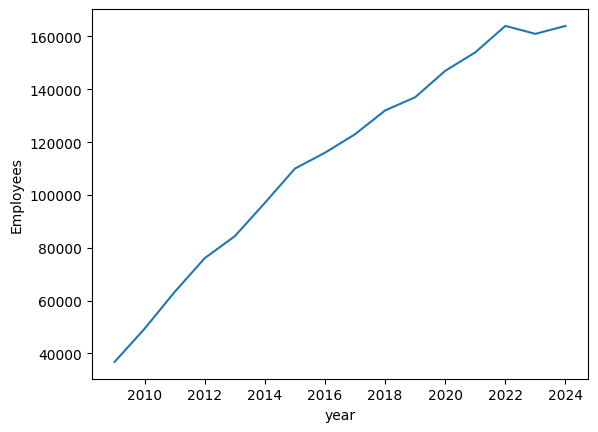

In [ ]:
#using seaborn to make a simple line plot 
sns.lineplot(data=clean_df,
x=clean_df['year'],
y=clean_df['Employees'])

In [ ]:
#using plotly to make an interactive plot this is good for dashboards 
import plotly.io as pio

fig = px.line(data_frame=clean_df,
x=clean_df['year'],
y=clean_df['Cash on Hand (millions)']
)

#display the tick labels as the actual number 
#plotly likes to add a k to the end if the number exceeds 100,000 but I want to use the OG number so I can have 
# more freedom 
fig.update_layout(
    xaxis=dict(
        tickformat="d"  # 'd' stands for a simple integer number
    ),
    yaxis=dict(
        tickformat="d"  # This also updates the y-axis ticks to display integers
    )
)

#dark mode because my eyes hurt 
#also make sure to change pio templates.default and NOT just pio.templates
#you will have to reload the entire thing (I learned the hard way)
pio.templates.default = 'plotly_dark'

fig.show()

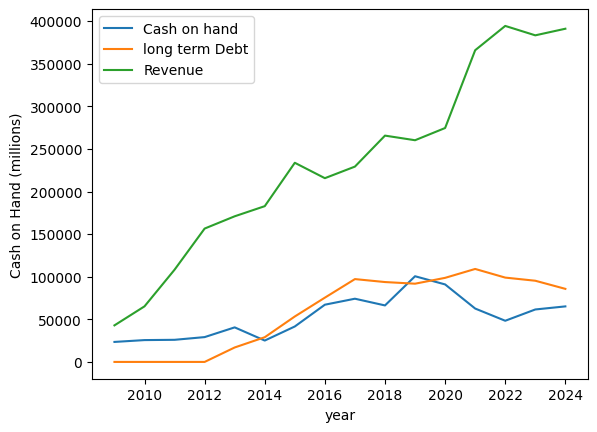

In [ ]:
# lets try to add some more lines to the line plots 
# I'm going to use seaborn for this because I want this graph to be simple

#i'm just picking some random lines
line1 = clean_df['Cash on Hand (millions)']
line2 = clean_df['Long Term Debt (millions)']
line3 = clean_df['Revenue (millions)']

# make 3 diffrent line plots
# we will have to add a label to each plot to make sure that they can all 
# be remembered by the legened 
sns.lineplot(data=clean_df,x=clean_df['year'], y=line1,label = 'Cash on hand')
sns.lineplot(data=clean_df,x=clean_df['year'], y=line2,label = 'long term Debt')
sns.lineplot(data=clean_df,x=clean_df['year'], y=line3, label = 'Revenue')

#use the legend to be able to tell the diffrence between graphs 
plt.legend()
#then show the plot lol
plt.show()

In [13]:
#making the graphs interactive with plotly 
import plotly.graph_objects as go

years = clean_df['year']
line1 = clean_df['Cash on Hand (millions)']
line2 = clean_df['Long Term Debt (millions)']
line3 = clean_df['Revenue (millions)']

# Create the figure
fig = go.Figure()

# Add the first line
fig.add_trace(go.Scatter(x=years, y=line1, mode='lines', name='Cash on Hand'))

# Add the second line
fig.add_trace(go.Scatter(x=years, y=line2, mode='lines', name='Long Term Debt'))

# Add the third line
fig.add_trace(go.Scatter(x=years, y=line3, mode='lines', name='Revenue'))

# Update layout (optional, for titles and axis labels)
fig.update_layout(
    title="Financial Overview",
    xaxis_title="Year",
    yaxis_title="Amount (millions)",
    template="plotly_dark"  
)

# Show the plot
fig.show()
